# KDE Plots

The purpose of this notebook is to reproduce figures presenting results from our interval statistics analysis using BChron age models. Here we show the application of interval statistic techniques to the median interval values.

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pyleoclim as pyleo

In [8]:
with open('../data/holo_chrons_study.pkl','rb') as handle:
    holo_chrons = pickle.load(handle)

with open('../data/pos_dict.pkl','rb') as handle:
    pos_dict = pickle.load(handle)

# Sort by latitude

lat_dict = {pos_dict[label]['lat']:label for label in holo_chrons.keys()}

sort_index = np.sort(np.array(list(lat_dict.keys())))[::-1]
sort_label = [lat_dict[lat] for lat in sort_index]
holo_chrons = {label:holo_chrons[label] for label in sort_label} #Sort by latitude
pos_dict = {label:pos_dict[label] for label in sort_label}

In [9]:
# detrending and collect d18O values at different intervals

#d18O values at different intervals
d18O_int={}
#Detrended zscore vals
zscore_detrend={}

for site in holo_chrons.keys():
    ty = holo_chrons[site]['d18O'].astype(float)
    chron_tmp = holo_chrons[site]['chron'].astype(float)
    nC = 1000

    zscore_detrend[site]=np.zeros((nC,len(ty)))
    zscore_detrend[site][:]=np.nan
    
    for j in range(nC):
        tx=chron_tmp[j,:]
        # detrending by the Pyleoclim detrending function
        ts = pyleo.Series(time=tx, value=ty,dropna=False)
        ts_detrended= ts.detrend(method='savitzky-golay')
        a=ts_detrended.value
        zscore_detrend[site][j,:] = zscore(a,nan_policy='omit')

    d18O_int[site]={}
    holo_int={}
    # int_size: interval size
    for int_size in [50,100,150,200,250,300]:
        holo_int[int_size] = np.arange(4000%int_size-int_size/2,10000,int_size)
        d18O_int[site][int_size]=np.zeros((len(holo_int[int_size])-1,nC))
        d18O_int[site][int_size][:]=np.nan
        # iterate over each interval
        for idx,tage in enumerate(holo_int[int_size][:-1]):
            for j in range(nC):
                tx = chron_tmp[j,:]
                #calculate median interval value for each chron
                d18O_int[site][int_size][idx,j]=np.nanmedian(zscore_detrend[site][j,(tx>=tage) & (tx<holo_int[int_size][idx+1])])

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_41797/2631039676.py:19: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True, which might modify your supplied time metadata.  Please set to False if you want a different behavior.
  ts = pyleo.Series(time=tx, value=ty,dropna=False)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_41797/2631039676.py:19: UserWarning: No time_unit parameter provided. Assuming years CE.
  ts = pyleo.Series(time=tx, value=ty,dropna=False)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_41797/2631039676.py:19: UserWarning: No time_name parameter provided. Assuming "Time".
  ts = pyleo.Series(time=tx, value=ty,dropna=False)
/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/pyleoclim/utils/tsutils.py:1417: UserWarning: Timeseries is not evenly-spaced, interpolating...
  warnings.warn("Timeseries is not evenly-spaced, interpolating...")
/Users/alexjames/miniconda3/envs/docs/

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis v

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_41797/2631039676.py:36: RuntimeWarning: All-NaN slice encountered
  d18O_int[site][int_size][idx,j]=np.nanmedian(zscore_detrend[site][j,(tx>=tage) & (tx<holo_int[int_size][idx+1])])
/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis v

/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

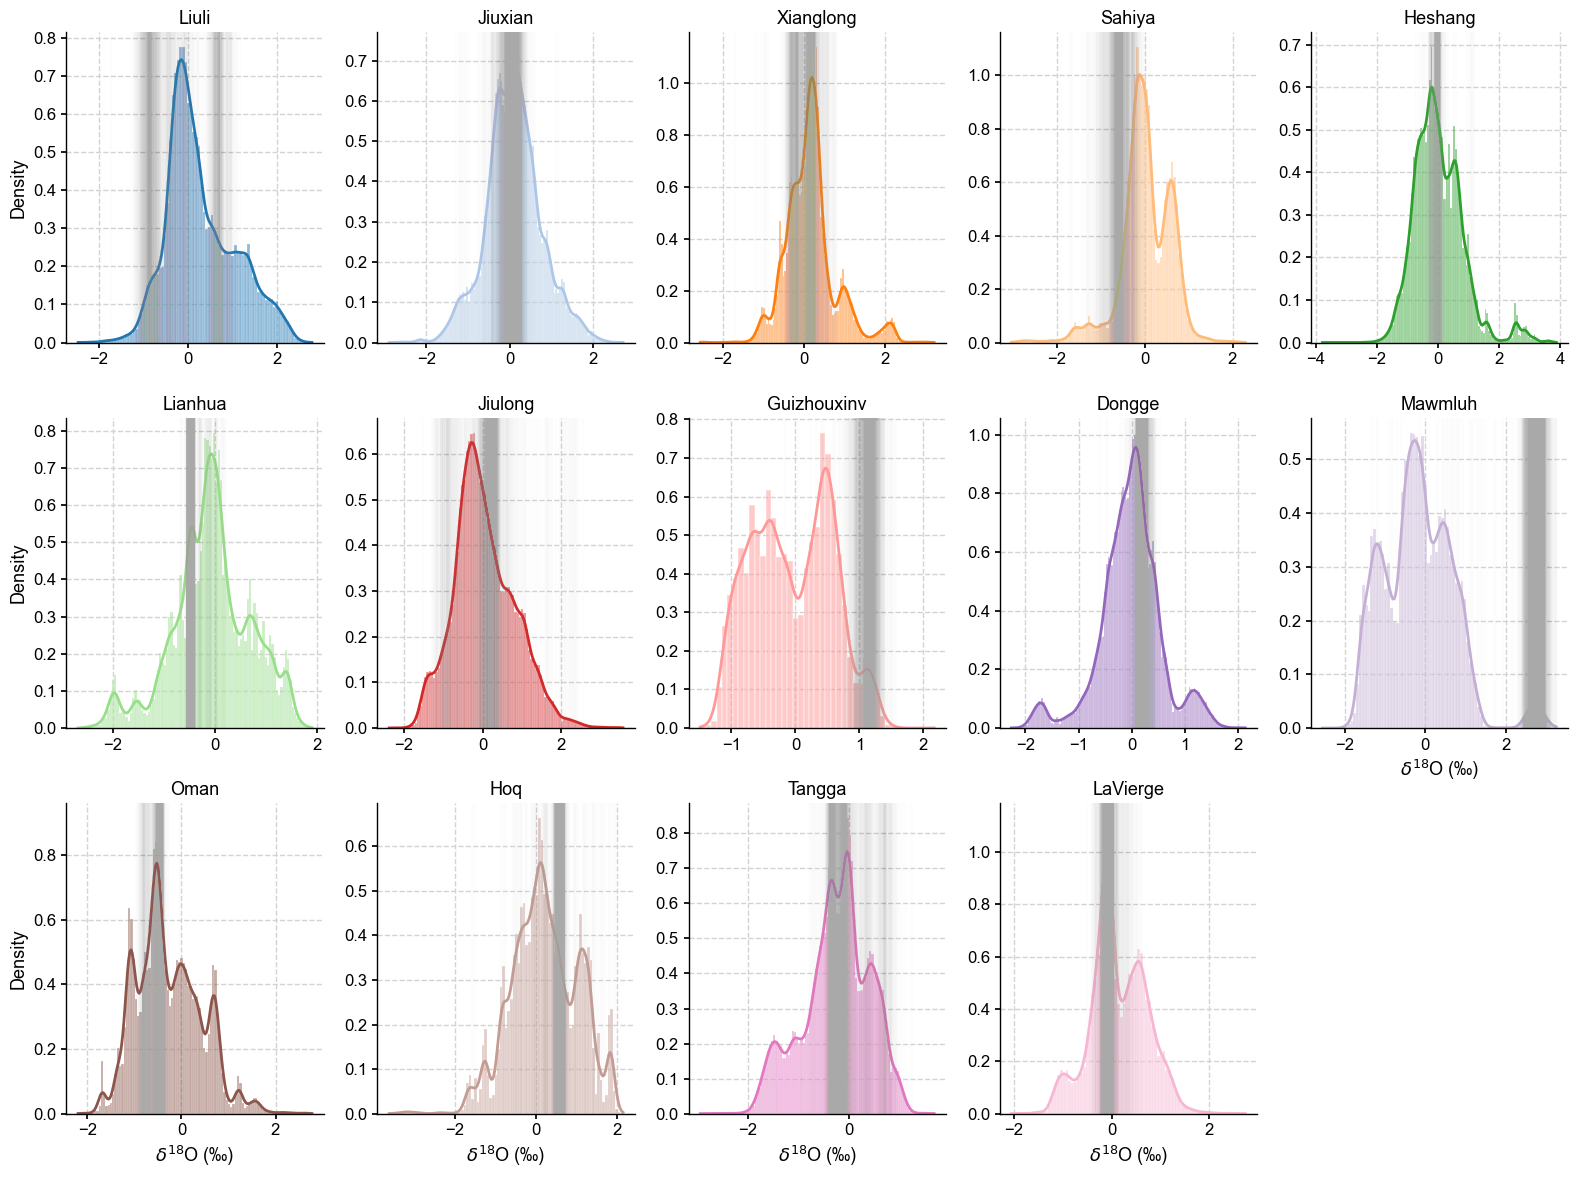

In [10]:
# Plotting

# Set color palette based on the number of keys in holo_chrons
clrs = sns.color_palette(palette='tab20', n_colors=len(holo_chrons.keys()) + 1)

# Create a figure with 5 columns and 3 rows of subplots
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(16, 12), tight_layout=True)

# Flatten the 2D array of axes into a 1D array
axes = ax.ravel()

int_size = 150

# Iterate over each site in holo_chrons
for idx, site in enumerate(holo_chrons.keys()):
   # Create a pandas Series from the flattened d18O_int for the current site and interval size
   s = pd.Series(d18O_int[site][int_size].flatten())
   
   # Plot a histogram with KDE for the current site
   sns.histplot(s.dropna(), color=clrs[idx], ax=axes[idx], kde=True, ec='white', stat='density')
   
   # Set the title of the subplot
   axes[idx].set_title(site, fontsize=13)
   
   # Set the y-label for specific subplots
   if idx in [0, 5, 10]:
       axes[idx].set_ylabel('Density', fontsize=13)
   else:
       axes[idx].set_ylabel('')
   
   # Set the tick label size for both axes
   axes[idx].tick_params(axis='both', which='major', labelsize=12)
   
   # Set the x-label for the bottom row of subplots
   if idx >= 9:
       axes[idx].set_xlabel(u'$\delta^{18}$O (\u2030)', fontsize=13)
   
   # Iterate over each column in d18O_int for the current site and interval size
   for i in range(d18O_int[site][int_size].shape[1]):
       # Add a vertical line at the specified x-value with low opacity
       axes[idx].axvline(x=d18O_int[site][int_size][holo_int[int_size][:-1] == 4000 - int_size / 2, i], alpha=0.01, color='darkgray')

# Remove the last unused subplot
fig.delaxes(axes[-1])

In [11]:
pyleo.savefig(fig,'../figures/interval_4k_dist_grey.pdf')

Figure saved at: "../../figures/interval_4k_dist_grey.pdf"
